In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing,cross_validation,svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

C:\Users\mohamed ismail\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
suez_cement=pd.read_csv("C:/Users/mohamed ismail/Desktop/GP And Data/Telecom Egypt.csv",index_col=1)

In [3]:
suez_cement.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
1/2/2013 0:00,EGS48031C016,742192,10760813.36,346,14.20,14.58,14.20,14.50
1/3/2013 0:00,EGS48031C016,659245,9540410.34,400,14.36,14.54,14.30,14.47
1/6/2013 0:00,EGS48031C016,657748,9532597.93,348,14.35,14.52,14.35,14.49
1/8/2013 0:00,EGS48031C016,762240,11182074.69,538,14.48,14.93,14.32,14.67
1/9/2013 0:00,EGS48031C016,838660,12528344.92,592,14.89,15.11,14.77,14.94


In [4]:
suez_cement=suez_cement[-500:]
suez_cement.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
12/16/2015 0:00,EGS48031C016,1528212,9387204.29,514,6.19,6.19,6.12,6.14
12/17/2015 0:00,EGS48031C016,978942,6107194.14,330,6.25,6.29,6.19,6.24
12/20/2015 0:00,EGS48031C016,686651,4237212.05,332,6.20,6.25,6.14,6.17
12/21/2015 0:00,EGS48031C016,519133,3211539.97,235,6.15,6.23,6.11,6.19
12/22/2015 0:00,EGS48031C016,825890,5171033.75,351,6.23,6.32,6.17,6.26


In [5]:
suez_cement['EWMA_12']=suez_cement['CLOSE_PRICE'].ewm(span=12).mean()
suez_cement['HL_PCT']=(suez_cement['HIGH_PRICE']-suez_cement['LOW_PRICE'])/suez_cement['LOW_PRICE']*100.0
suez_cement['PCT_change']=(suez_cement['CLOSE_PRICE']-suez_cement['OPEN_PRICE'])/suez_cement['OPEN_PRICE']*100.0
suez_cement.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,EWMA_12,HL_PCT,PCT_change
TRADE_DATE,,,,,,,,,,,
12/16/2015 0:00,EGS48031C016,1528212,9387204.29,514,6.19,6.19,6.12,6.14,6.140000,1.143791,-0.807754
12/17/2015 0:00,EGS48031C016,978942,6107194.14,330,6.25,6.29,6.19,6.24,6.194167,1.615509,-0.160000
12/20/2015 0:00,EGS48031C016,686651,4237212.05,332,6.20,6.25,6.14,6.17,6.184734,1.791531,-0.483871
12/21/2015 0:00,EGS48031C016,519133,3211539.97,235,6.15,6.23,6.11,6.19,6.186397,1.963993,0.650407
12/22/2015 0:00,EGS48031C016,825890,5171033.75,351,6.23,6.32,6.17,6.26,6.206394,2.431118,0.481541


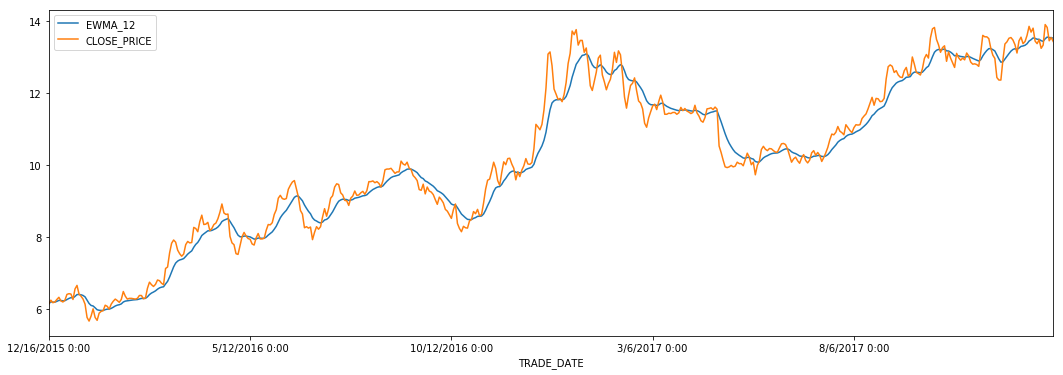

In [6]:
tmp=suez_cement[['EWMA_12','CLOSE_PRICE']].plot(figsize=(18,6))
plt.show()

In [7]:
suez_cement.dropna(inplace=True)
len(suez_cement)

500

In [8]:
suez_cement['CLOSE_PRICE'].shift(-5).tail()

TRADE_DATE
12/25/2017 0:00   NaN
12/26/2017 0:00   NaN
12/27/2017 0:00   NaN
12/28/2017 0:00   NaN
12/31/2017 0:00   NaN
Name: CLOSE_PRICE, dtype: float64

In [9]:
X=suez_cement[['EWMA_12','HL_PCT','PCT_change']].values
X

array([[  6.14      ,   1.14379085,  -0.80775444],
       [  6.19416667,   1.61550889,  -0.16      ],
       [  6.18473441,   1.79153094,  -0.48387097],
       ..., 
       [ 13.52777404,   2.17065868,  -1.3215859 ],
       [ 13.52811649,   2.08955224,   0.97014925],
       [ 13.51148319,   0.9715994 ,  -0.66617321]])

In [10]:
y=suez_cement['CLOSE_PRICE'].values
y

array([  6.14,   6.24,   6.17,   6.19,   6.26,   6.32,   6.22,   6.19,
         6.24,   6.4 ,   6.42,   6.41,   6.26,   6.55,   6.65,   6.41,
         6.35,   6.27,   6.13,   5.76,   5.66,   5.8 ,   6.  ,   5.76,
         5.68,   5.88,   5.93,   5.95,   6.1 ,   6.07,   5.99,   6.13,
         6.21,   6.27,   6.23,   6.18,   6.26,   6.48,   6.35,   6.27,
         6.29,   6.29,   6.28,   6.27,   6.29,   6.37,   6.37,   6.28,
         6.3 ,   6.57,   6.74,   6.67,   6.62,   6.68,   6.8 ,   6.78,
         6.71,   6.67,   7.12,   7.16,   7.55,   7.82,   7.91,   7.85,
         7.63,   7.53,   7.46,   7.52,   7.78,   7.87,   7.83,   7.84,
         8.26,   8.23,   8.14,   8.42,   8.6 ,   8.34,   8.35,   8.4 ,
         8.17,   8.23,   8.34,   8.38,   8.5 ,   8.68,   8.91,   8.66,
         8.62,   8.63,   8.01,   7.83,   7.78,   7.53,   7.51,   7.76,
         8.  ,   8.12,   8.02,   7.95,   7.93,   7.8 ,   7.77,   7.97,
         8.09,   7.94,   7.94,   7.96,   8.18,   8.34,   8.33,   8.39,
      

In [11]:
len(X),len(y)

(500, 500)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False,random_state=1)

In [13]:
len(X),len(X_train),len(X_test)

(500, 350, 150)

In [14]:
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [15]:
LR=LinearRegression()
KNN=KNeighborsRegressor(n_neighbors=3)
SVR=svm.SVR(kernel='rbf')

In [16]:
LR.fit(X_train,y_train)
KNN.fit(X_train,y_train)
SVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred_LR=LR.predict(X_test)
y_pred_KNN=KNN.predict(X_test)
y_pred_SVR=SVR.predict(X_test)
len(y_pred_LR)

150

In [18]:
suez_cement['LR_pred']=np.nan
suez_cement['KNN_pred']=np.nan
suez_cement['SVR_pred']=np.nan
suez_cement['LR_pred'].iloc[350:]=y_pred_LR
suez_cement['KNN_pred'].iloc[350:]=y_pred_KNN
suez_cement['SVR_pred'].iloc[350:]=y_pred_SVR

C:\Users\mohamed ismail\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
suez_cement.tail()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,EWMA_12,HL_PCT,PCT_change,LR_pred,KNN_pred,SVR_pred
TRADE_DATE,,,,,,,,,,,,,,
12/25/2017 0:00,EGS48031C016,3062782,42551770.77,842,13.44,14.03,13.30,13.89,13.495321,5.488722,3.348214,13.873498,12.500000,12.075794
12/26/2017 0:00,EGS48031C016,364077,5028239.36,142,13.80,13.90,13.68,13.81,13.543733,1.608187,0.072464,13.518721,12.820000,12.525529
12/27/2017 0:00,EGS48031C016,610672,8207441.74,242,13.62,13.65,13.36,13.44,13.527774,2.170659,-1.321586,13.403574,12.433333,12.468284
12/28/2017 0:00,EGS48031C016,525026,7102266.77,256,13.40,13.68,13.40,13.53,13.528116,2.089552,0.970149,13.594664,13.216667,12.513881
12/31/2017 0:00,EGS48031C016,621441,8337761.07,236,13.51,13.51,13.38,13.42,13.511483,0.971599,-0.666173,13.403692,12.653333,12.194618


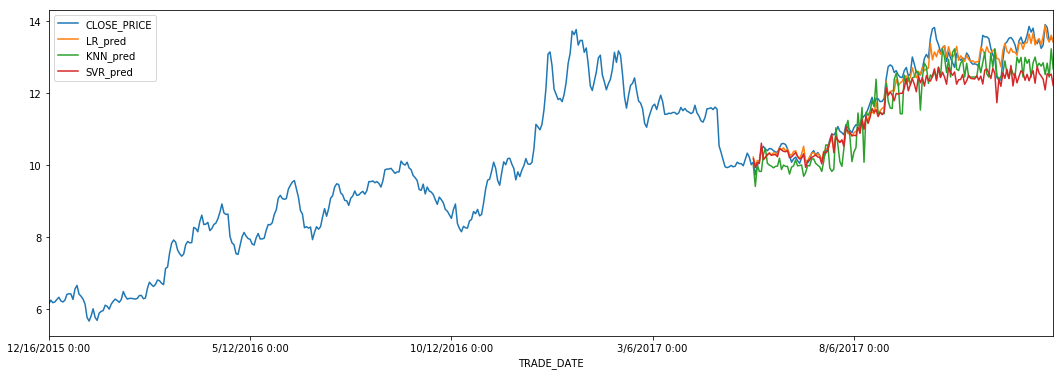

In [20]:
suez_cement[['CLOSE_PRICE','LR_pred','KNN_pred','SVR_pred']].plot(figsize=(18,6))
plt.show()

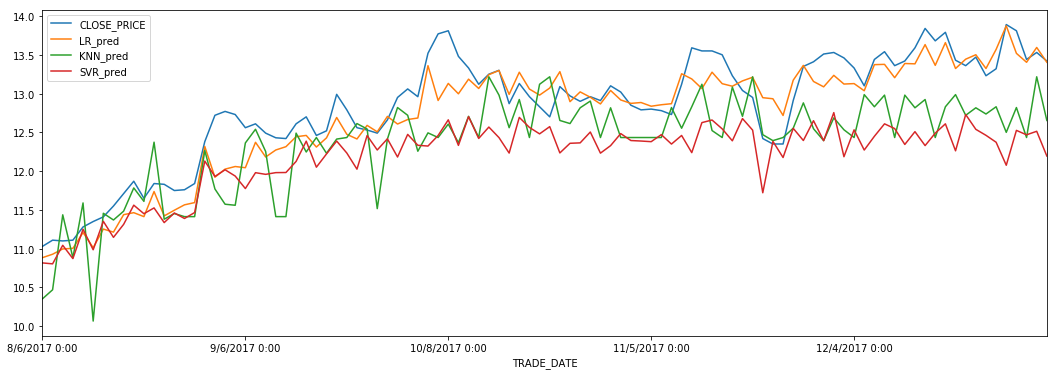

In [21]:
suez_cement[['CLOSE_PRICE','LR_pred','KNN_pred','SVR_pred']][400:].plot(figsize=(18,6))
plt.show()

In [22]:
LR_RMSE=np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_LR))
KNN_RMSE=np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_KNN))
SVR_RMSE=np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_SVR))

In [23]:
print('Linear Regression :',LR_RMSE)
print('KNN :',KNN_RMSE)
print('SVR :',SVR_RMSE)

Linear Regression : 0.24858468174
KNN : 0.581872711039
SVR : 0.61742084206


In [24]:
LR_RMSE=mean_squared_error(y_true=y_test,y_pred=y_pred_LR)
KNN_RMSE=mean_squared_error(y_true=y_test,y_pred=y_pred_KNN)
SVR_RMSE=mean_squared_error(y_true=y_test,y_pred=y_pred_SVR)

In [25]:
print('Linear Regression :',LR_RMSE)
print('KNN :',KNN_RMSE)
print('SVR :',SVR_RMSE)

Linear Regression : 0.0617943439957
KNN : 0.338575851852
SVR : 0.38120849621
